In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import missingno as msn

In [2]:
df = pd.read_csv('data.csv')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# target variable is a categorical feature and others are numericl features

In [10]:
#inspect missing values

<AxesSubplot:>

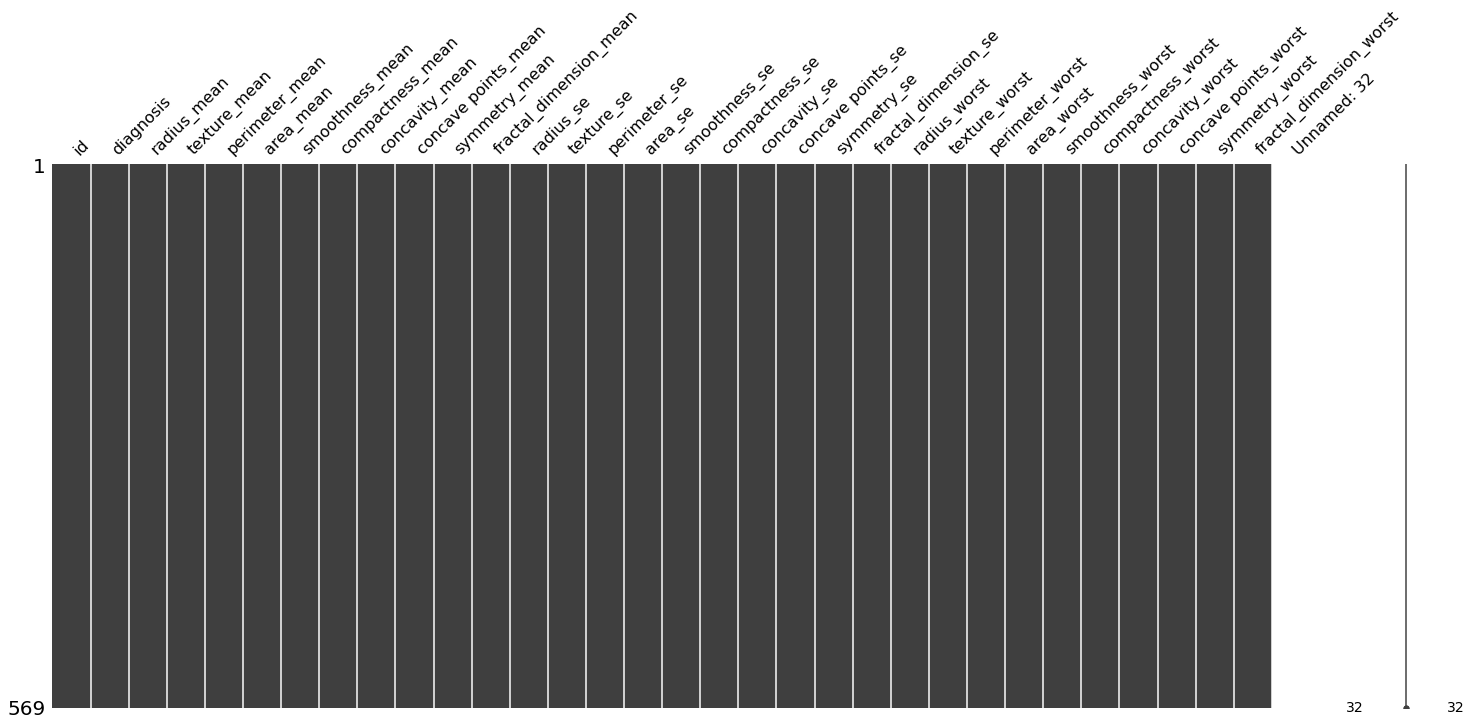

In [11]:
msn.matrix(df)

In [12]:
# there are no missing values

In [13]:
df.shape

(569, 33)

In [14]:
# 569 rows

In [28]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [29]:
numerical = [x for x in df.columns if df[x].dtypes == 'float64']

In [21]:
# check outliers

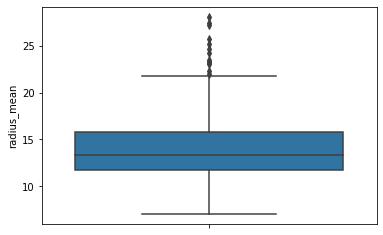

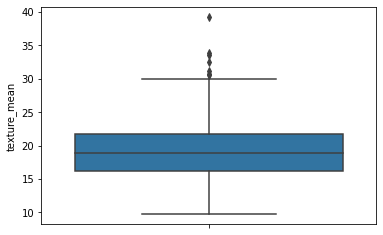

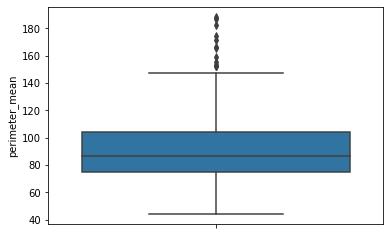

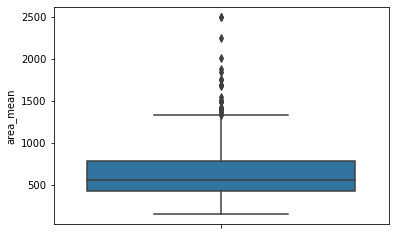

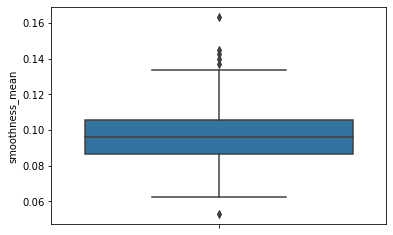

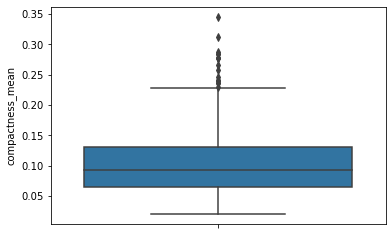

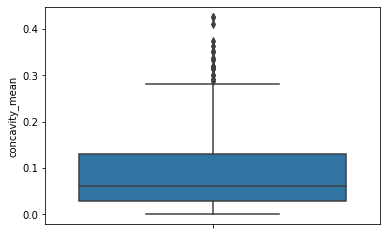

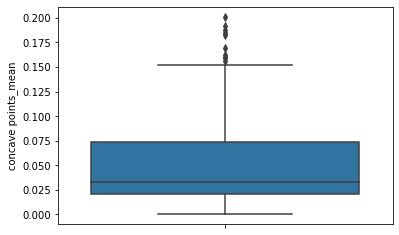

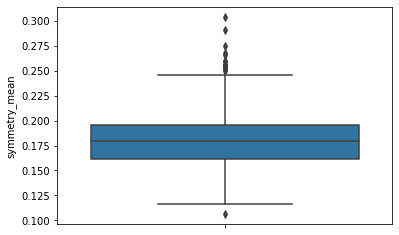

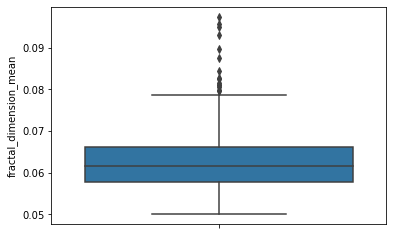

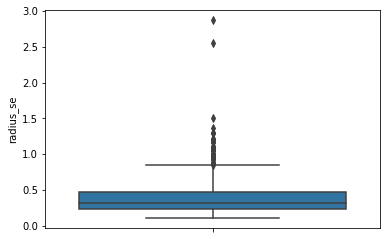

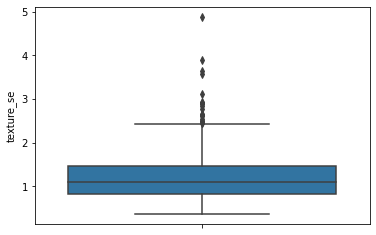

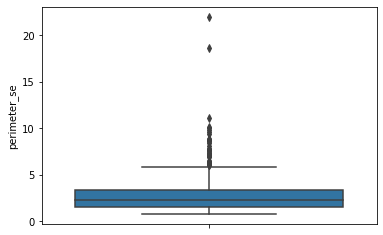

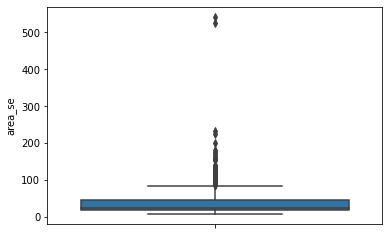

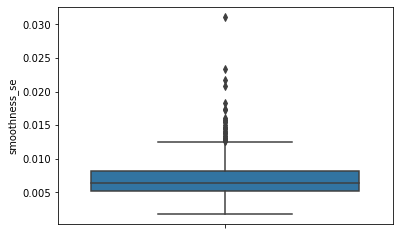

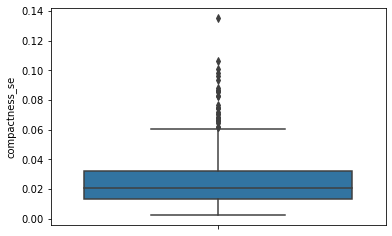

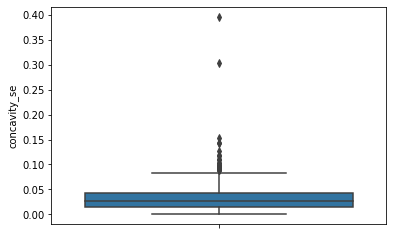

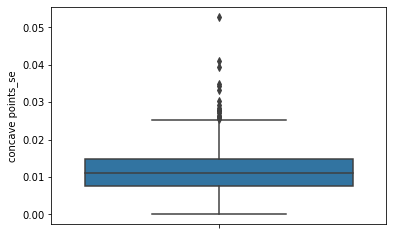

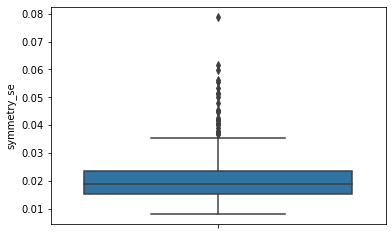

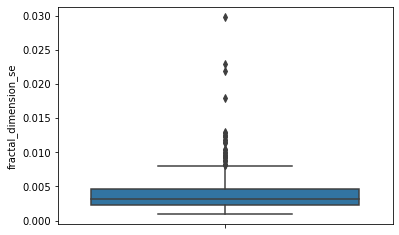

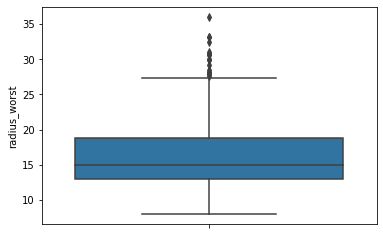

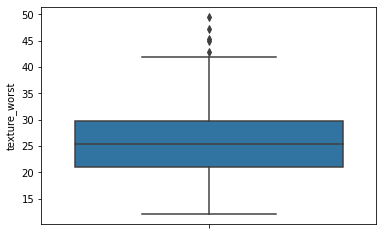

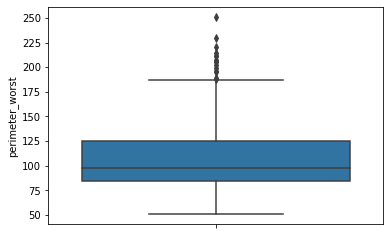

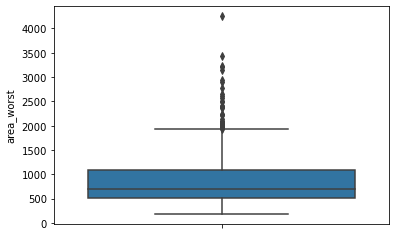

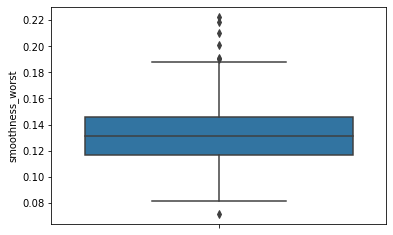

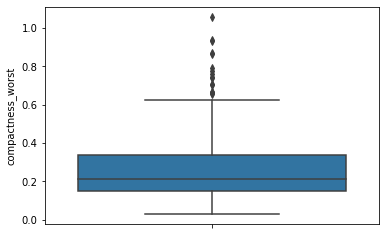

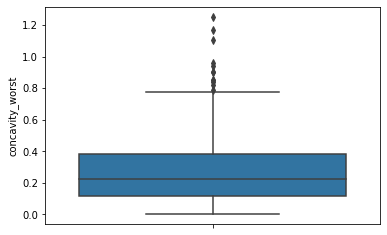

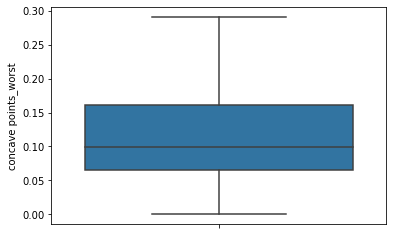

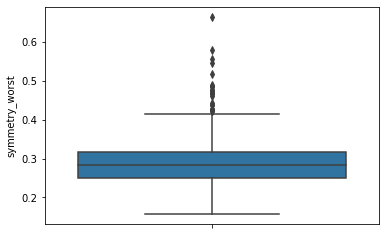

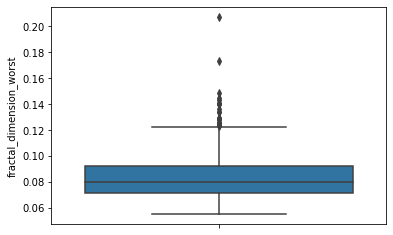

In [30]:
for x in numerical:
    sns.boxplot(data=df, y=x)
    plt.show()

In [25]:
# correlation heatmap for check the correlationship of each features

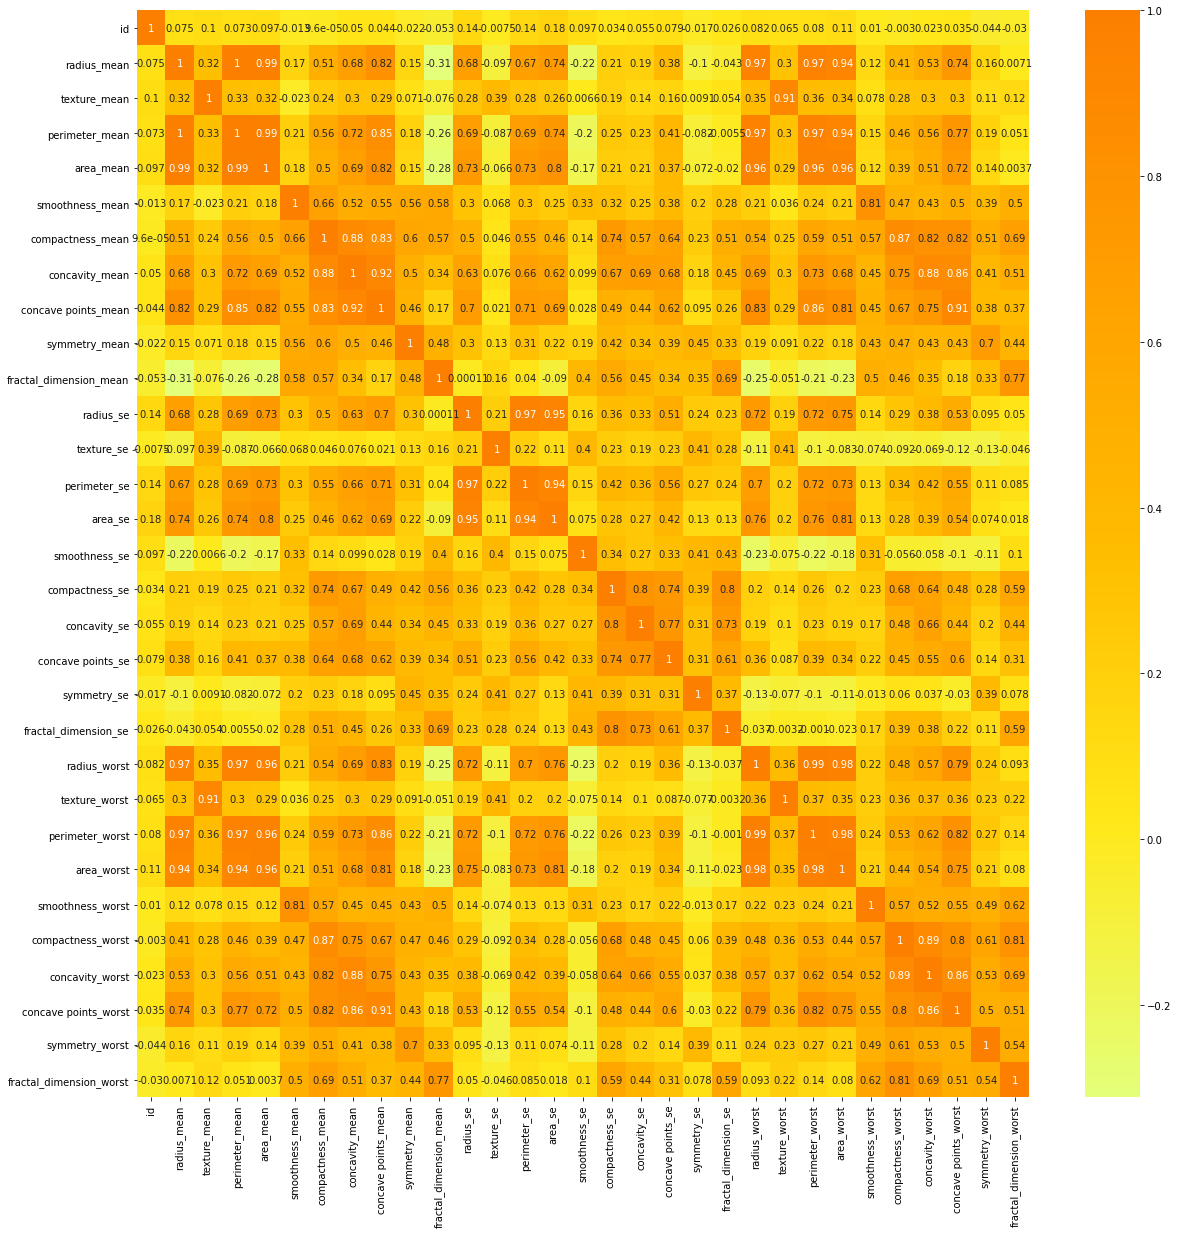

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Wistia')
plt.show()

In [32]:
# we can see many of features are correlated each other

In [37]:
# lets seee how heatmap shows when we add diagnosis to it

In [39]:
df1 = df.copy()

In [42]:
dic = {'B':0,'M':1}
df1['diagnosis'] = df1['diagnosis'].map(dic)

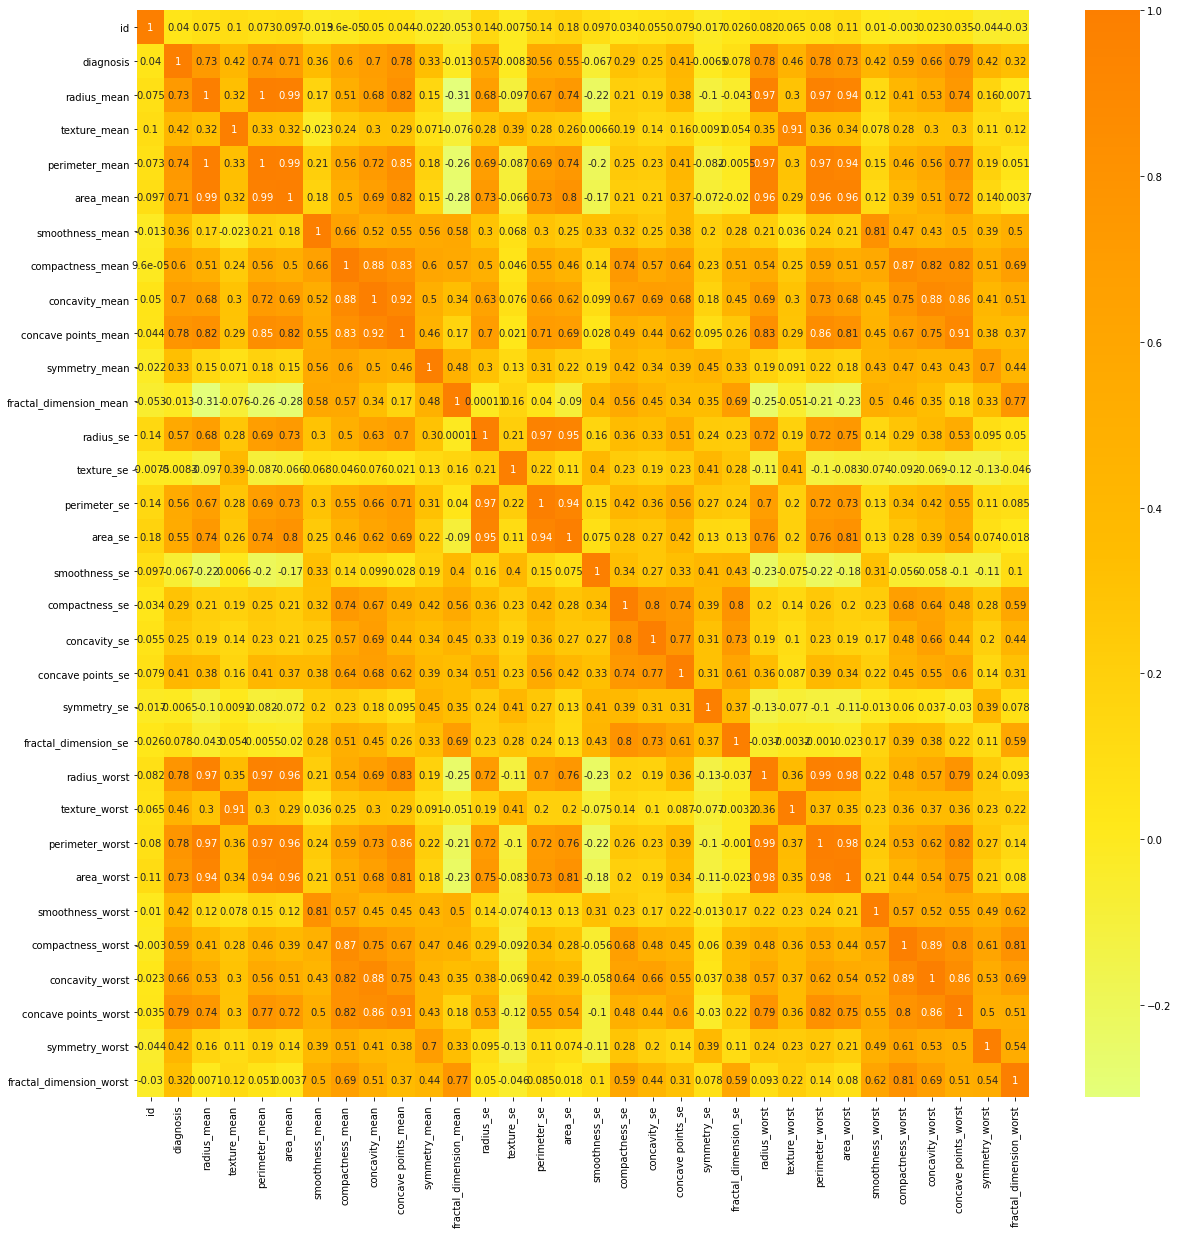

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='Wistia')
plt.show()

In [44]:
# get top 12 features which highly correalted with diagnosis

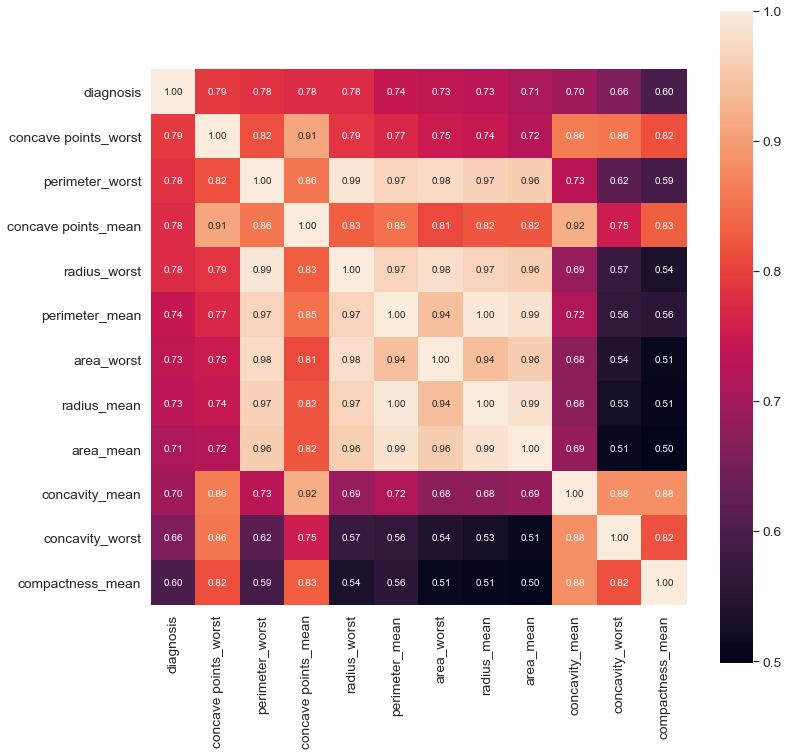

In [54]:
k = 12 #number of variables for heatmap
cols = df1.corr().nlargest(k, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [55]:
# we can see some of above features are correlated each other we can drop one of them
#'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean'

In [56]:
cols = df1.corr().nlargest(k, 'diagnosis')['diagnosis'].index

In [57]:
cols

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean'],
      dtype='object')

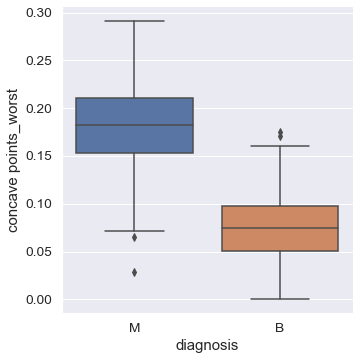

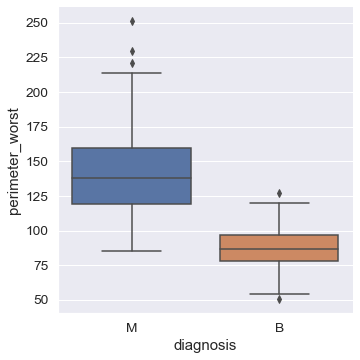

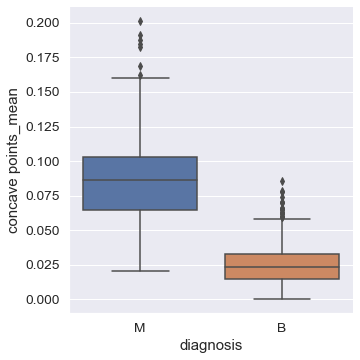

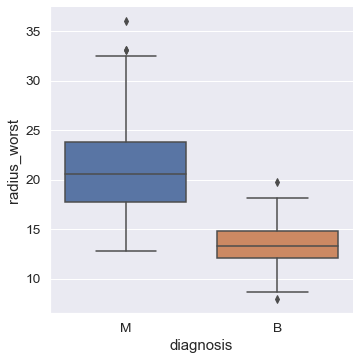

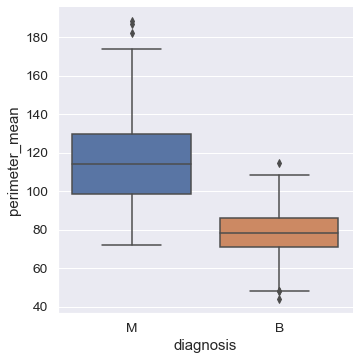

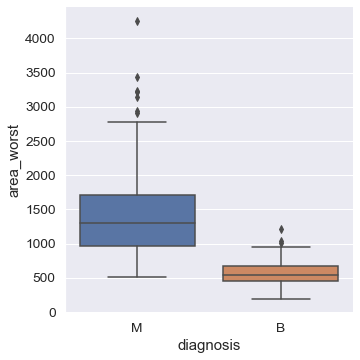

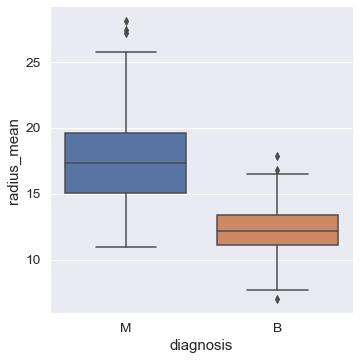

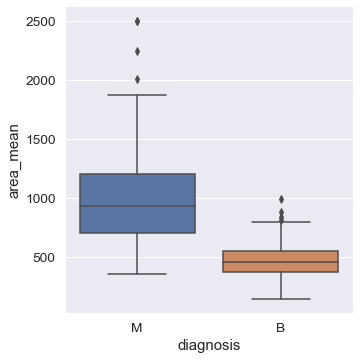

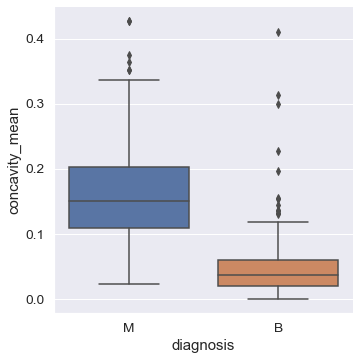

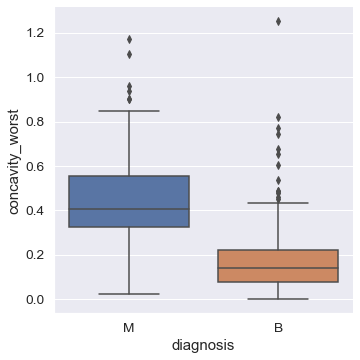

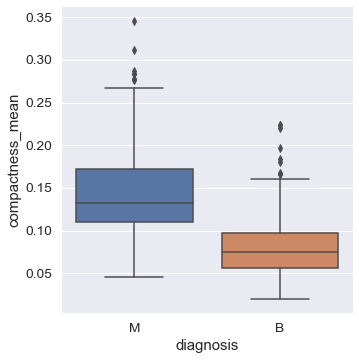

In [58]:
ftr = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean']
for i in ftr:
    sns.catplot(data=df,x='diagnosis',y=i,kind='box')
    pd.pivot_table(data=df, index=['diagnosis'],values=[i],aggfunc='mean')
    plt.show()

In [59]:
# we can choose few most important featues for predict the diagnosis

In [ ]:
chosen_features = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']